In [260]:
#IMPORT REQUIRED LIBS 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [261]:
#READ THE DATASET TO A DATA FRAME
data=pd.read_csv("/Users/apple/Documents/ML Prep/titanic/titanic/train.csv")

In [262]:
#BASIC VIEW OF THE DATA
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [263]:
#NO OF ROWAS AND COLUMNS
data.shape

(891, 12)

In [264]:
#GET BASIC INFO ABOUT THE DATA
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# EDA

In [265]:
#GET NUMBER OF MISSING VALUES
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [266]:
#HANDLING THE MISSING VALUES
# -> As too many values are null in cabin, we drop the dataset
data=data.drop(columns='Cabin',axis=1)



In [267]:
# -> We can get the mean for age and fill the missing values with mean
data.fillna(data['Age'].mean(),inplace=True)


In [268]:
# -> Get the mode for embarked and replace the missing values with it
data.fillna(data['Embarked'].mode(),inplace=True)

In [269]:
# Checking if all the null values have been replaced/discarded
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Data Analysis

In [270]:
#STATISTICAL MEASURES
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [271]:
#Finding no. of people that survived and not survived
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [272]:
#Finding no. Male/Female
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

# Data Visualization

In [273]:
sns.set()

/Users/apple/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

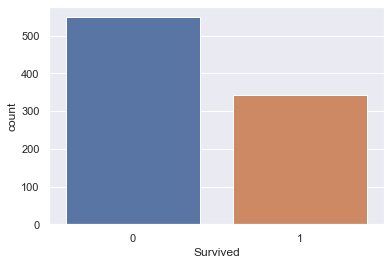

In [274]:
#Making a count plot for survivng problem
sns.countplot('Survived',data=data)

/Users/apple/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

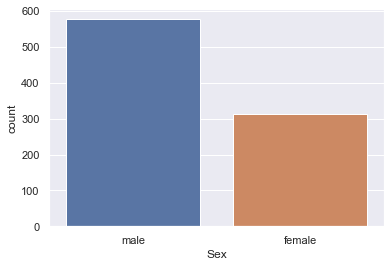

In [275]:
sns.countplot('Sex',data=data)

/Users/apple/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

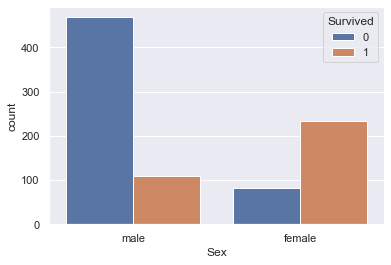

In [276]:
#Genderwise survivors
sns.countplot('Sex',hue='Survived',data=data)

#### From the above graph we can come to a conclusion that females were given preference at the time of sinking

/Users/apple/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

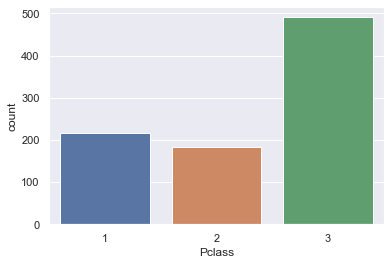

In [277]:
#classwise countplot
sns.countplot('Pclass',data=data)

/Users/apple/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

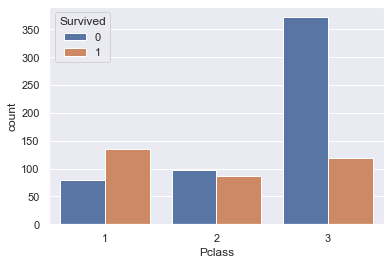

In [278]:
#Classwise survivors
sns.countplot('Pclass',hue='Survived',data=data)

/Users/apple/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

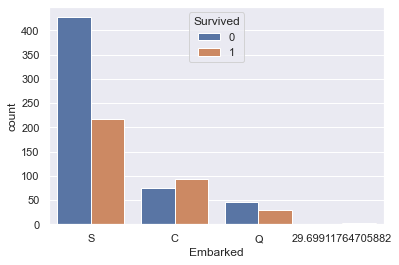

In [279]:
#BEmbarked-Survivors
sns.countplot('Embarked',hue='Survived',data=data)

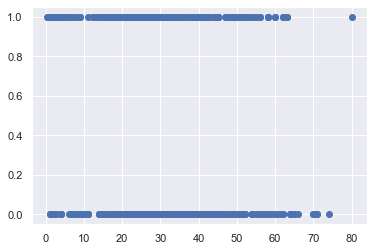

In [280]:
plt.scatter(data['Age'], data['Survived'])

In [281]:
#Encoding Categorical Columns(sex,embarked)
data['Sex'].value_counts()
data['Embarked'].value_counts()

S                    644
C                    168
Q                     77
29.69911764705882      2
Name: Embarked, dtype: int64

In [282]:
data.replace({'Sex':{'male':0,'female':1}},inplace=True)
data.replace({'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [283]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0.0


#### Getting Features and Targets

In [284]:
X= data.drop(columns=['PassengerId','Name','Ticket','Survived','Fare'],axis=1)
Y= data['Survived']

In [285]:
print(X)

     Pclass  Sex        Age  SibSp  Parch  Embarked
0         3    0  22.000000      1      0       0.0
1         1    1  38.000000      1      0       1.0
2         3    1  26.000000      0      0       0.0
3         1    1  35.000000      1      0       0.0
4         3    0  35.000000      0      0       0.0
..      ...  ...        ...    ...    ...       ...
886       2    0  27.000000      0      0       0.0
887       1    1  19.000000      0      0       0.0
888       3    1  29.699118      1      2       0.0
889       1    0  26.000000      0      0       1.0
890       3    0  32.000000      0      0       2.0

[891 rows x 6 columns]


In [286]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


#### Splitting Test&Train

In [287]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [288]:
print(X.shape,X_train.shape,X_test.shape)

(891, 6) (712, 6) (179, 6)


# Model Training 
(Logistic Regression)

In [289]:
model = LogisticRegression()

In [290]:
#Training the Logistic Regression Model
model.fit(X_train,Y_train)

LogisticRegression()

# Model Evalutaion

In [291]:
#Accuracy of Training Data
X_train_predict = model.predict(X_train)

In [292]:
print(X_train_predict)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [293]:
train_data_accuracy=accuracy_score(Y_train,X_train_predict)
print("Accuracy Score: ",train_data_accuracy)

Accuracy Score:  0.8103932584269663


In [294]:
#Predicting for Test Data
X_test_predict = model.predict(X_test)

In [297]:
test_data_accuracy=accuracy_score(Y_test,X_test_predict)
print("Accuracy Score: ",test_data_accuracy)

Accuracy Score:  0.7877094972067039


#### From the above Accuracy Scores we can conclude that the model is accurate as test and train data setsets have almost same accuracy score 

In [311]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
707,1,0,42.0,0,0,0.0
37,3,0,21.0,0,0,0.0
615,2,1,24.0,1,2,0.0
169,3,0,28.0,0,0,0.0
68,3,1,17.0,4,2,0.0


In [319]:
#Sample Dataset
c1=3
c2=0
c3=21.0
c4=0
c5=0
c6=0.0
input_variables = pd.DataFrame([[c1,c2,c3,c4,c5,c6,]],columns=['Pclass', 'Sex', 'Age','SibSp','Parch','Embarked'],dtype=float)
    

In [320]:
prediction = model.predict(input_variables)[0]

In [321]:
print(prediction)

0


In [318]:
display(Y_test)

707    1
37     0
615    1
169    0
68     1
      ..
89     0
80     0
846    0
870    0
251    0
Name: Survived, Length: 179, dtype: int64